# Лабораторная работа 4. Обучение с учителем. Задача классификации (дедлайн: 24.11.2023)

Изучить примеры в тетрадках *.ipynb.

Задание 1 \
Смотреть в файле Lab4_Ex1 Basic_Classifiers.ipyn

Задание 2 \
• Загрузите датасет для классификации (см. файл Excel для Лаб.работы №3), проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку. \
• Масштабируйте числовые признаки. \
• В случае дисбаланса проведите балансировку. \
• Решите задачу классификации на ваших данных с использованием рассмотренных моделей Sklearn: k-NN, Naive Bayes, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры. \
• Вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score. \
• Построить итоговую модель классификаторов (см. Lab4_Ex5 ClassificationModel.ipynb).

Задание 3 \
• Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1 \
• Самостоятельно реализуйте kNN.

Дополнительные баллы \
• Самостоятельно реализуйте SVM с возможностью выбирать ядро.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Задание № 1


Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [4]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]


df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [5]:
df.groupby(['weather', 'stroll'])['stroll'].count()

weather   stroll
дождь     False     2
          True      1
облачно   False     1
          True      3
снег      False     3
          True      1
солнечно  False     1
          True      3
Name: stroll, dtype: int64

$P(stroll|raining) =\frac{P(stroll) \cdot P(raining | stroll)}{P(raining)}$ (4)

* Возможность (Likelihood):  $P(raining | yes)$(общее количество дождливых дней, деленное на общее количество прогулок)

* Априорная вероятность класса: $P (stroll)$

* Априорная вероятность предиктора:$P(raining)$

In [6]:
p_raining =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_raining

0.2

In [7]:
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_stroll

0.5333333333333333

In [8]:
# вероятность того,что среди прогулочных дней шел дождик
p_raining_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
p_raining_if_stroll

0.125

In [9]:
# результат
p_stroll_if_raining = (p_stroll * p_raining_if_stroll)/p_raining
p_stroll_if_raining

0.3333333333333333

# Задание № 2

## Инициализация проекта

In [10]:
df = pd.read_csv('C:/Users/seito/Jupyter Notebook/data/smoke_detector_task.csv')

**Feature Description:**

- `UTC` - Время, когда был проведен эксперимент.
- `Temperature` - Температура окружающей среды в градусах Цельсия
- `Humidity` - Влажность воздуха во время эксперимента.
- `TVOC` - Общее количество летучих органических соединений, измеряется в ppb (частях на миллиард)
- `eCo2` - Эквивалентная концентрация CO2, измеряется в промиллях (частях на миллион)
- `Raw H2` - Количество необработанного водорода, присутствующего в окружающей среде.
- `Raw Ethanol` - Количество сырого этанола, присутствующего в окружающей среде.
- `Pressure` - Давление воздуха. Измеряется в ГПа
- `PM1.0` - Гранулированное вещество диаметром менее 1,0 мкм .
- `PM2.5` - Гранулированное вещество диаметром менее 2,5 мкм.
- `NC0.5` - Концентрация твердых частиц диаметром менее 0,5 мкм.
- `NC1.0` - Концентрация твердых частиц диаметром менее 1,0 мкм.
- `NC2.5` - Концентрация твердых частиц диаметром менее 2,5 мкм.
- `CNT` - Простой подсчет.
- `Fire Alarm` - (Реальность) Если присутствовал пожар, то значение равно 1, в противном случае оно равно 0.

## Предварительная подготовка данных

In [11]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,No


### Коррекция названия столбцов

In [12]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [13]:
df.drop(['Unnamed: 0','CNT','UTC'],axis=1,inplace=True)

In [14]:
renamed_columns = {
    'Temperature[C]' : 'Temperature',
    'Humidity[%]' : 'Humidity',
    'TVOC[ppb]' : 'TVOC',
    'eCO2[ppm]' : 'eCO2',
    'Pressure[hPa]' : 'Pressure'
}
df = df.rename(columns = renamed_columns)

### One-Hot Coding (Горячее кодирование)

In [15]:
df['Fire Alarm'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Fire Alarm'].unique()

array([0, 1], dtype=int64)

### Заполнение пропусков

In [16]:
df.isna().sum()

Temperature    146
Humidity       247
TVOC           621
eCO2           325
Raw H2         111
Raw Ethanol      0
Pressure        27
PM1.0            0
PM2.5          317
NC0.5            0
NC1.0          252
NC2.5            0
Fire Alarm       0
dtype: int64

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

TVOC           0.009915
eCO2           0.005189
PM2.5          0.005061
NC1.0          0.004024
Humidity       0.003944
Temperature    0.002331
Raw H2         0.001772
Pressure       0.000431
Raw Ethanol    0.000000
PM1.0          0.000000
NC0.5          0.000000
NC2.5          0.000000
Fire Alarm     0.000000
dtype: float64

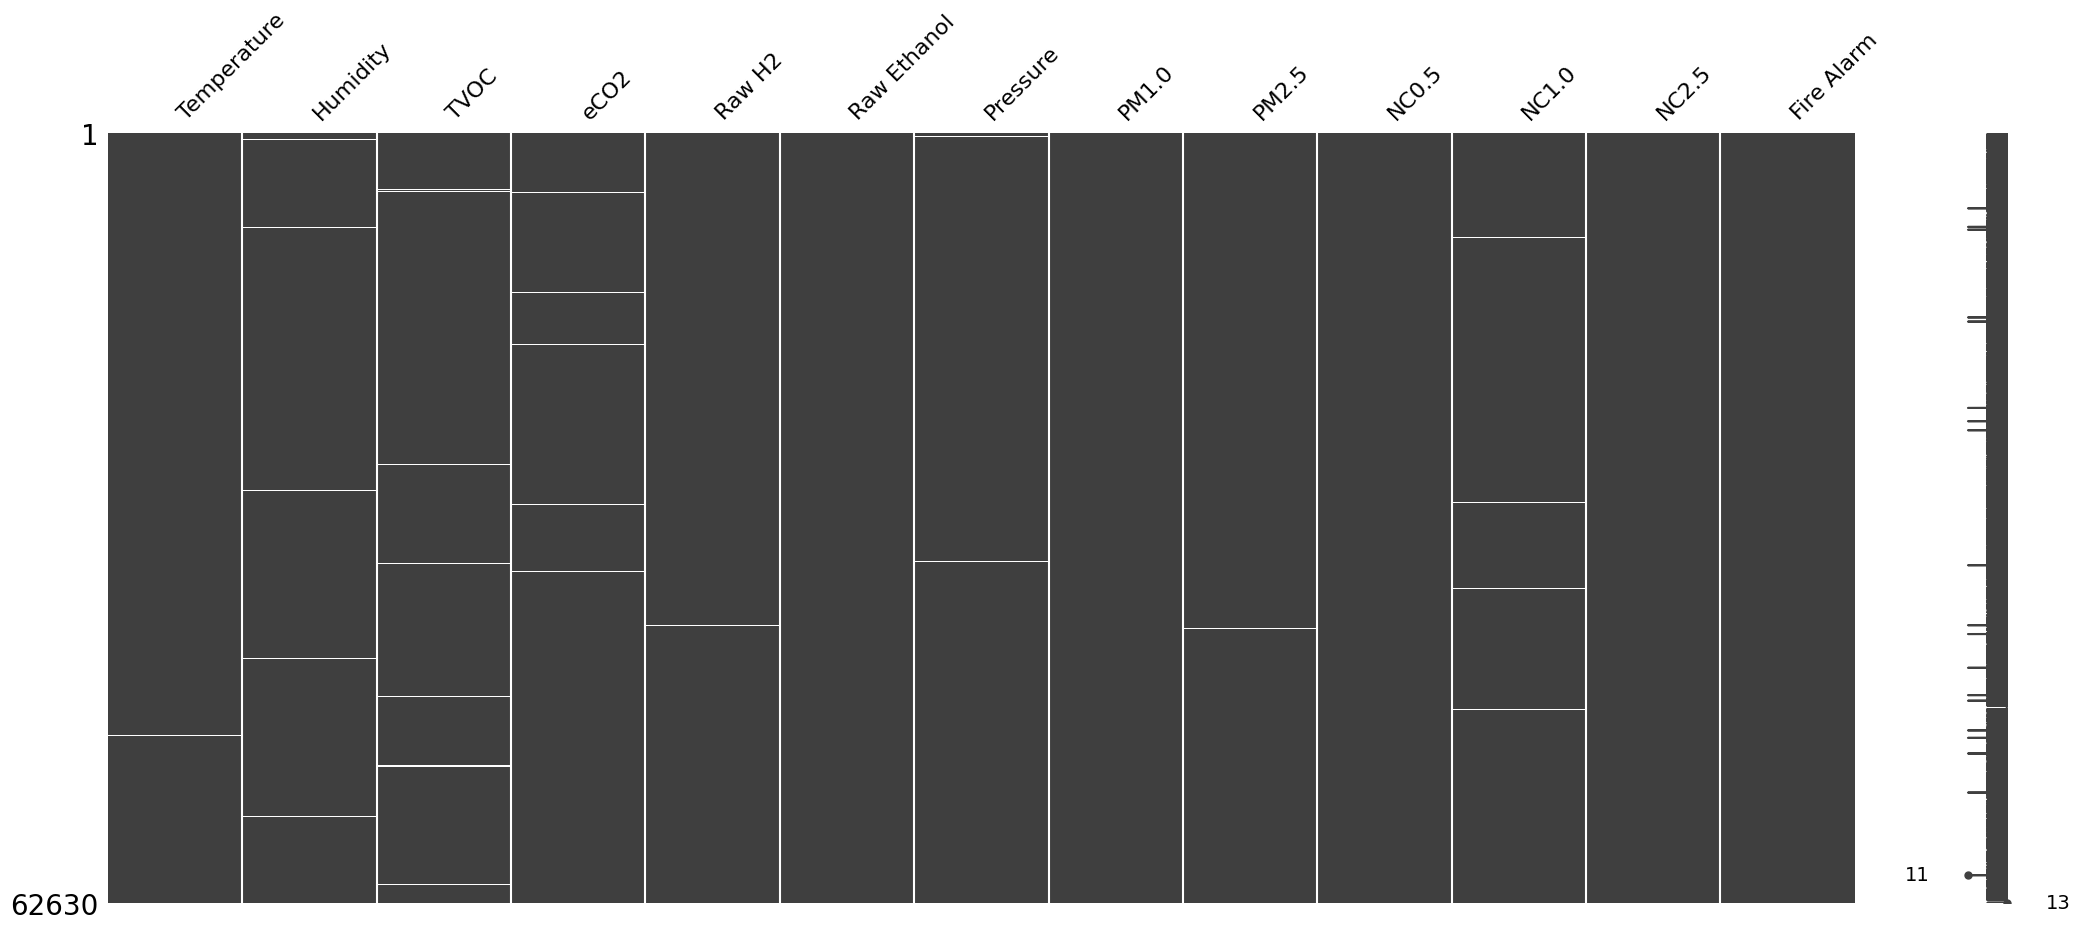

In [18]:
# посмотрим на пропуски визуально
import missingno as msn

msn.matrix(df)
plt.show()

Пропуски не пересекаются, а жаль :(

In [19]:
df.loc[df.isnull().any(axis=1)]

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
69,20.976,50.92,7.0,407.0,NaN,19630,939.771,0.10,0.36,0.03,0.419,0.256,0
71,21.003,50.55,18.0,412.0,12534.0,19646,939.773,0.08,NaN,0.03,0.341,0.208,0
144,21.946,NaN,4.0,406.0,12565.0,19659,939.819,0.00,0.00,0.00,0.001,0.001,0
163,22.178,55.61,11.0,410.0,12562.0,19649,939.799,0.00,NaN,0.00,0.000,0.000,0
221,22.848,56.39,11.0,NaN,12608.0,19674,939.790,0.07,0.15,0.31,0.163,0.072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62356,-17.415,13.05,NaN,400.0,13562.0,19996,936.692,0.74,0.77,5.09,0.793,0.018,0
62361,-17.099,12.52,NaN,400.0,13597.0,20089,936.704,0.85,0.89,5.87,0.916,0.021,0
62392,-14.876,13.05,2090.0,400.0,13630.0,20133,936.680,0.99,1.03,6.81,NaN,0.024,0
62393,-14.797,13.16,2095.0,NaN,13638.0,20145,936.681,0.99,1.03,6.84,1.066,0.024,0


$2027/62484$ пропусков. Это всего 0.03 % от всех данных, удалим их

In [20]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

### Удаление явных дубликатов

In [21]:
df.duplicated().sum()

2

In [22]:
df = df.drop_duplicates().reset_index(drop=True)  # удаление дубликатов
df.duplicated().sum() 

0

In [23]:
df.isna().sum()

Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw H2         0
Raw Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
Fire Alarm     0
dtype: int64

### Коррекция типов данных

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60601 entries, 0 to 60600
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  60601 non-null  float64
 1   Humidity     60601 non-null  float64
 2   TVOC         60601 non-null  float64
 3   eCO2         60601 non-null  float64
 4   Raw H2       60601 non-null  float64
 5   Raw Ethanol  60601 non-null  int64  
 6   Pressure     60601 non-null  float64
 7   PM1.0        60601 non-null  float64
 8   PM2.5        60601 non-null  float64
 9   NC0.5        60601 non-null  float64
 10  NC1.0        60601 non-null  float64
 11  NC2.5        60601 non-null  float64
 12  Fire Alarm   60601 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 6.0 MB


In [25]:
columns_to_int = ['TVOC', 'eCO2', 'Raw H2']
df[columns_to_int] = df[columns_to_int].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60601 entries, 0 to 60600
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  60601 non-null  float64
 1   Humidity     60601 non-null  float64
 2   TVOC         60601 non-null  int32  
 3   eCO2         60601 non-null  int32  
 4   Raw H2       60601 non-null  int32  
 5   Raw Ethanol  60601 non-null  int64  
 6   Pressure     60601 non-null  float64
 7   PM1.0        60601 non-null  float64
 8   PM2.5        60601 non-null  float64
 9   NC0.5        60601 non-null  float64
 10  NC1.0        60601 non-null  float64
 11  NC2.5        60601 non-null  float64
 12  Fire Alarm   60601 non-null  int64  
dtypes: float64(8), int32(3), int64(2)
memory usage: 5.3 MB


## EDA (Разведочный анализ данных)

In [27]:
df.describe()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000,60601.000000
mean,15.969058,48.530821,1940.287058,670.574215,12942.486923,19754.796918,938.626205,100.459821,184.541505,490.001672,203.697440,80.252986,0.714394
std,14.364118,8.885217,7803.486524,1910.865389,272.413696,609.224168,1.334205,922.986735,1980.916435,4264.045902,2220.234595,1087.883821,0.451706
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.980000,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.330000,8.790000,1.381000,0.033000,0.000000
50%,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.410000,53.240000,1189.000000,438.000000,13109.000000,20079.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


Много выбросов в столбцах - 'TVOC[ppb]', 'eCO2[ppm]', 'PM1.0', 'NC0.5',	'NC1.0', 'NC2.5'

In [28]:
df.nunique()

Temperature    21218
Humidity        3877
TVOC            1963
eCO2            1697
Raw H2          1827
Raw Ethanol     2656
Pressure        2212
PM1.0           1323
PM2.5           1337
NC0.5           3079
NC1.0           4099
NC2.5           1149
Fire Alarm         2
dtype: int64

<Figure size 2000x2000 with 0 Axes>

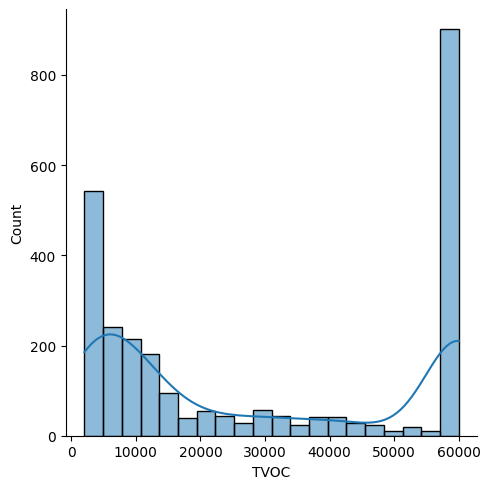

In [29]:
plt.figure(figsize=(20,20))
sns.displot(df.loc[df["TVOC"] > 2000, 'TVOC'],bins=20,kde=True);

In [30]:
outlier = df[['TVOC', 'eCO2', 'PM1.0', 'NC0.5', 'NC1.0', 'NC2.5']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1
filtered_outlier = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_outlier

,TVOC,eCO2,PM1.0,NC0.5,NC1.0,NC2.5
233,2,400,0.07,0.36,0.131,0.047
234,3,400,0.08,0.42,0.151,0.055
235,1,400,0.08,0.43,0.156,0.056
242,5,400,0.09,0.46,0.189,0.074
243,0,400,0.10,0.49,0.189,0.072
...,...,...,...,...,...,...
60596,625,400,0.63,4.32,0.673,0.015
60597,612,400,0.61,4.18,0.652,0.015
60598,627,400,0.57,3.95,0.617,0.014
60599,638,400,0.57,3.92,0.611,0.014


Убрать $45735$ из $60601$ строк - 💀💀💀. Попробуем ужиться с выбросами ...

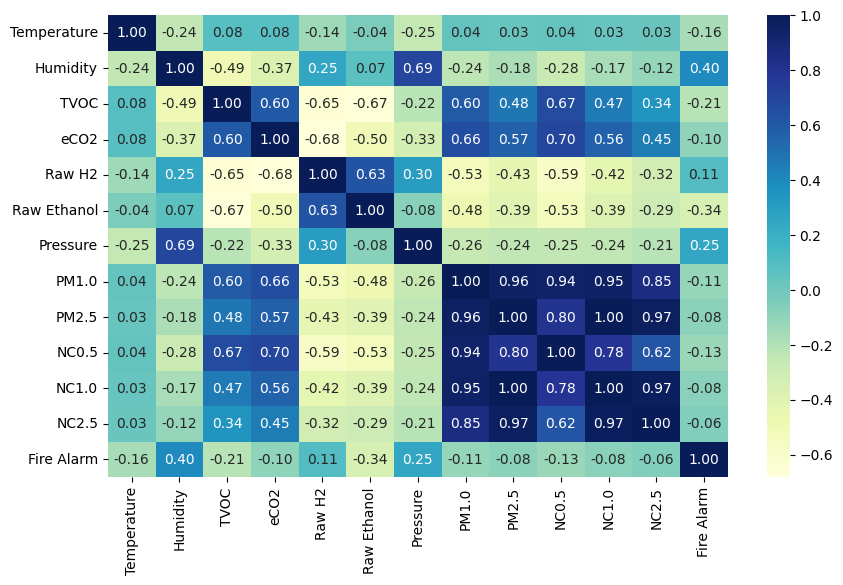

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

Норм корреляции в столбце 'Fire Alarm' : 'Humidity', 'TVOC', 'Raw Ethanol', 'Pressure'

C:\Users\seito\AppData\Local\Temp\ipykernel_5228\4048047268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr, y=labels, palette='mako')


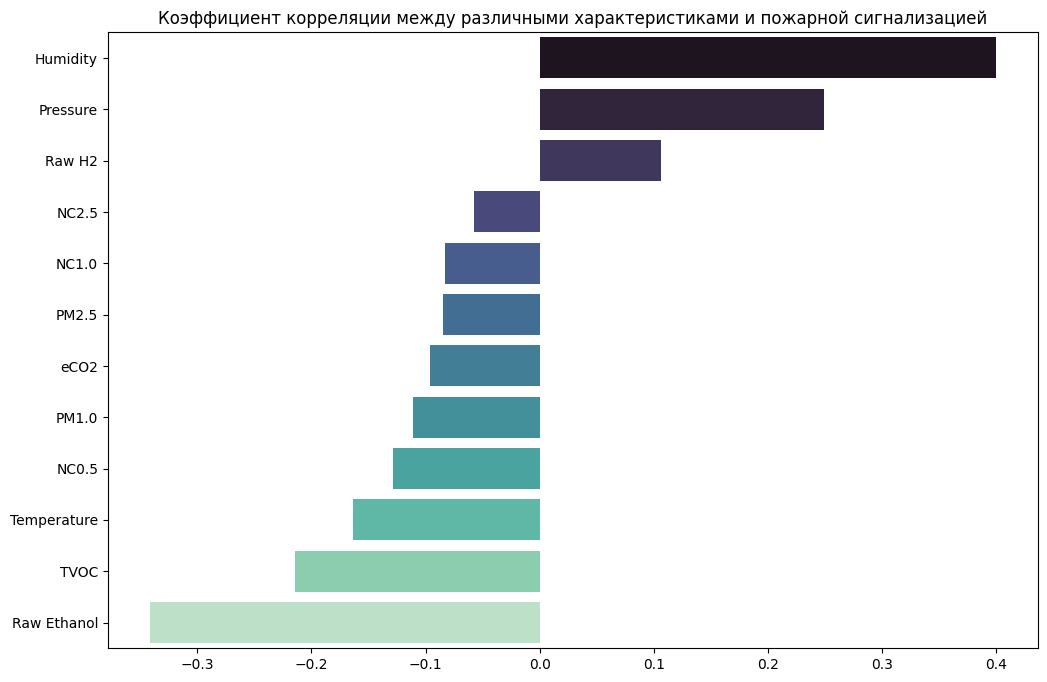

In [32]:
plt.figure(figsize=(12,8))
corr_alarm = df.corr()["Fire Alarm"].sort_values(ascending=False)
indices = corr_alarm.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(corr_alarm[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Коэффициент корреляции между различными характеристиками и пожарной сигнализацией')
plt.show()

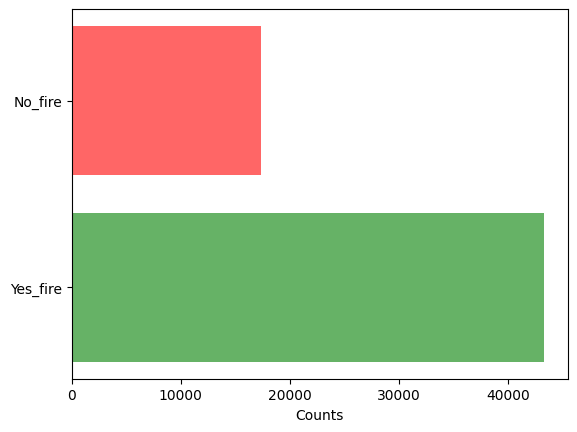

In [33]:
yes_fire = df[(df['Fire Alarm'] != 0)]['Fire Alarm']
no_fire = df[(df['Fire Alarm'] == 0)]['Fire Alarm']

plt.barh(['Yes_fire', 'No_fire'], [yes_fire.count(), no_fire.count()], color = ['g', 'r'], alpha=0.6)
plt.xlabel('Counts')
plt.show()

Наблюдается большой дисбаланс классов

Возможные варианты решения:
* Down sampling -- удаляем объекты мажоритарного класса (у байса все сломается)
* Upper sampling -- добавляем объекты миноритарного класса (дублирование, SMOTE)

In [34]:
df['Fire Alarm'].value_counts()

1    43293
0    17308
Name: Fire Alarm, dtype: int64

Посмотрим на распределение самого коррелирующего признака - `Humidity` (влажность воздуха во время эксперимента)

C:\Users\seito\AppData\Local\Temp\ipykernel_5228\4213039631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])


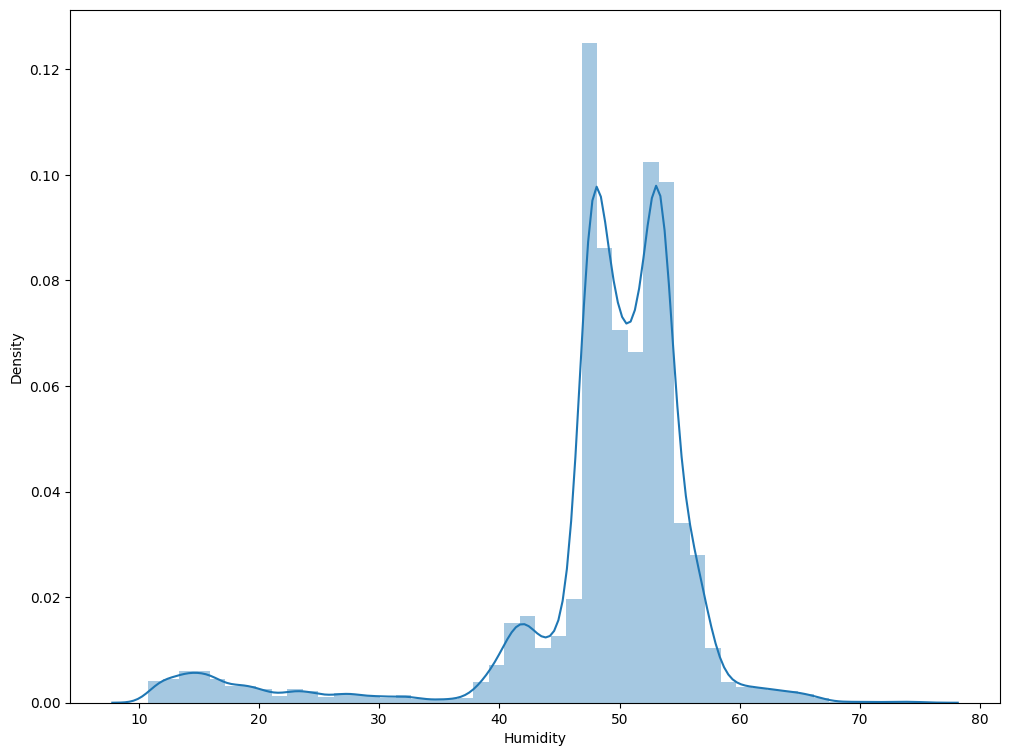

In [35]:
plt.figure(figsize=(12,9))

sns.distplot(df['Humidity'])
plt.show()

In [36]:
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


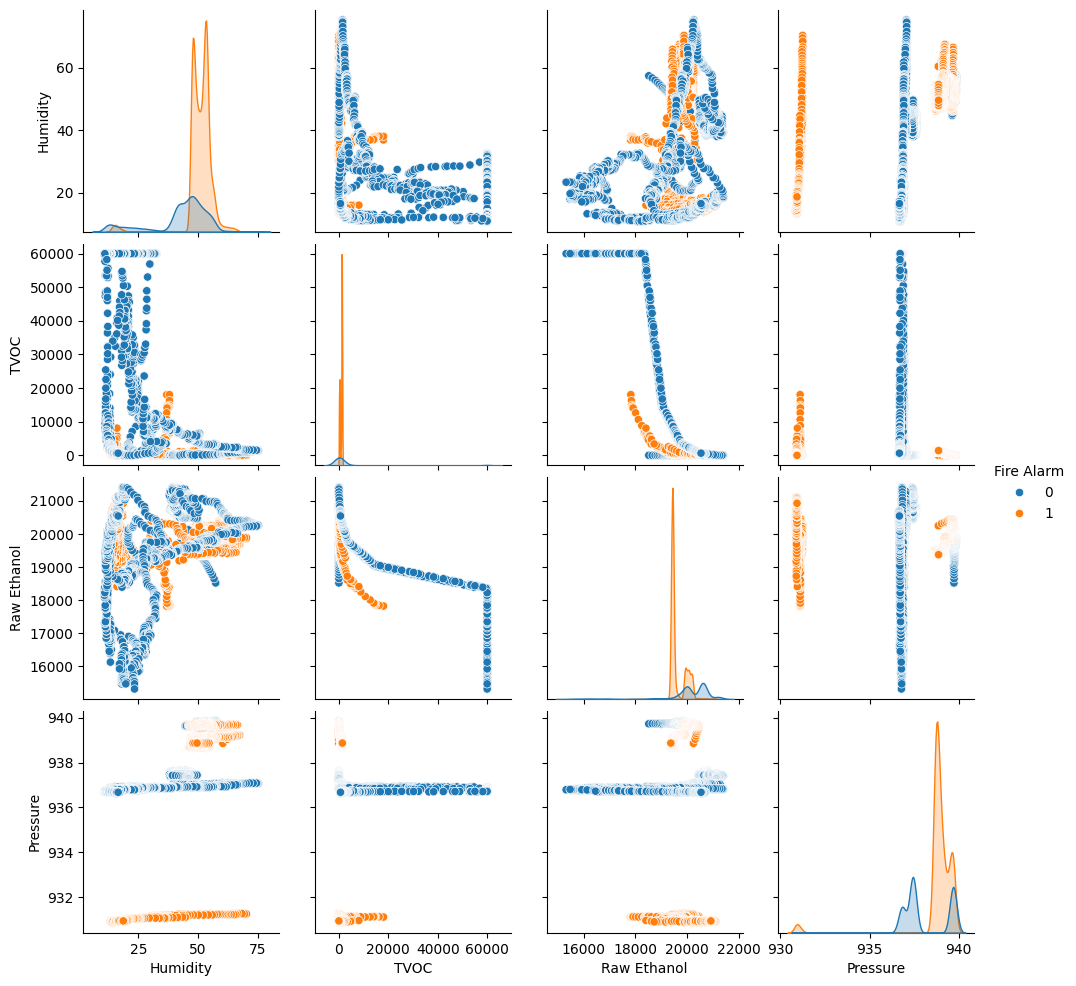

In [37]:
l = ['Humidity', 'TVOC', 'Raw Ethanol', 'Pressure', 'Fire Alarm']

sns.pairplot(df[l], hue='Fire Alarm')
plt.show()

In [41]:
df.to_csv("c:/Users/seito/Jupyter Notebook/data/dataset4_with_EDA", index=False)

## Подготовка данных для моделирования

### Шаг № 1: выделение целевого признака и предикторов

In [ ]:
y = df['Fire Alarm']
X = df.drop(['Fire Alarm'], axis=1)

Предикторы

In [ ]:
X

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
60596,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
60597,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
60598,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
60599,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


Целевой признак

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
60596    0
60597    0
60598    0
60599    0
60600    0
Name: Fire Alarm, Length: 60601, dtype: int64

### Шаг № 2: разделение данных на обучающую и тестовую выборки

**Обучать модели** будем на наборах X_train и y_train. А **оценивать** их качество на наборах X_test и y_test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48480, 12), (48480,), (12121, 12), (12121,))

### Standard Scaler

new_x = (x - mean) / std

`StandardScaler` чувствителен к выбросам, и при наличии выбросов функции могут масштабироваться по-разному друг от друга. 

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Построение моделей классификации

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier # Стохастический градиентный спуск - прост метод оптимизации для функции потерь = СВМ
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

### Подбор гиперпараметров

#### KNeighborsClassifier

Подберем оптимальное значение для гиперпараметра K для метода k-ближайших соседей

Выбор оптимального значения для K с помощью метода «Локтя»

In [ ]:
# error_rates = []

# for i in np.arange(1, 101):
#    new_model = KNeighborsClassifier(n_neighbors = i)
#    new_model.fit(X_train, y_train)
#    new_predictions = new_model.predict(X_test)
#    error_rates.append(np.mean(new_predictions != y_test)) 

#plt.plot(error_rates);

Значит нужно брать число соседей как можно меньше :) Будем использовать значение по дефолту - k = 5

#### Naive Bayes Classification

Подберем оптимальное значение для гиперпараметра var_smoothing (часть наибольшей дисперсии из всех характеристик, которая добавляется к дисперсиям для стабильности расчета) в методе Наивного Байесовского классификатора

Этот параметр существенно расширяет (или "сглаживает") кривую и учитывает больше выборок, которые находятся дальше от среднего распределения.

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 4.328761281083053e-06}

In [ ]:
bp_gs_NB = gs_NB.best_params_['var_smoothing']

#### Logistic Regression

Подберем оптимальное значение для гиперпараметра 'solver' (алгоритм для использования в задаче оптимизации) в методе Логистической регрессии

In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_clf = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='accuracy')
grid_clf.fit(X_train, y_train)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

LogisticRegression(solver='sag')
{'solver': 'sag'}
0.8963283828382839


c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
bp_lr = grid_clf.best_params_['solver']

### Построение и оценка моделей

МЕТРИКИ

* **Accuracy** (точность) - количество верно классифицированных объектов / общее количество объектов
* **Confusion Matrix**
<table class="iksweb">
	<tbody>
		<tr>
			<td>n = total predictions</td>
			<td>Actual: No</td>
			<td>Actual: Yes</td>
		</tr>
		<tr>
			<td>Predicted: No</td>
			<td>True Negative</td>
			<td>False Negative</td>
		</tr>
		<tr>
			<td>Predicted: Yes</td>
			<td>False Positive</td>
			<td>True Positive
</td>
		</tr>
	</tbody>
</table>

True Negative (TN, Истинно отрицательный): модель дала прогноз No, и фактическое значение также было No \
True Positive (TP, Истинно положительный): модель предсказала Yes, и реально значение также оказалось верным \
False Negative (FN, Ложно-отрицательный): модель предсказала No, но фактически значение было Yes (*ошибка II рода*) \
False Positive (FP, Ложное срабатывание): модель предсказала Yes, но фактически значение было No (*ошибка I рода*)
* **Precision, Recall, F-мера**
	* $P$ – число истинных результатов, $P = TP + FN$
	* $N$ – число ложных результатов, $N = TN + FP.$


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)
* **ROC AUC Score** - площадь под кривой (Area Under Curve) ошибок. Кривая представляет из себя линию от (0,0) до (1,1) в координатах TPR и FPR

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, precision_recall_curve
import time

In [ ]:
models = [KNeighborsClassifier(), GaussianNB(var_smoothing=bp_gs_NB), LogisticRegression(solver=bp_lr), SVC(), SGDClassifier(loss='hinge')]

In [ ]:
Name = []
Accuracy = []
Time_Taken = []
Confusion_Matrix = []
Precision = []
Recall = []
F1_score = []
Classification_Report = []
AUC = []

for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(y_test, y_pred))
    Confusion_Matrix.append(confusion_matrix(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))
    F1_score.append(f1_score(y_test, y_pred))
    AUC.append(roc_auc_score(y_test, y_pred))
    Time_Taken.append(end-begin)

    Classification_Report.append(classification_report(y_test,y_pred))

c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
Dict = {'Name':Name,'Time Taken':Time_Taken, 
        'Confusion Matrix' : Confusion_Matrix, 
        'Accuracy': Accuracy, 'Precision': Precision,
        'Recall': Recall, 'F1-score': F1_score,
        'AUC' : AUC}
model_df = pd.DataFrame(Dict)

model_df

,Name,Time Taken,Confusion Matrix,Accuracy,Precision,Recall,F1-score,AUC
0,KNeighborsClassifier,0.436376,"[[3458, 10], [9, 8644]]",0.998432,0.998844,0.998960,0.998902,0.998038
1,GaussianNB,0.011456,"[[848, 2620], [206, 8447]]",0.766851,0.763260,0.976193,0.856694,0.610357
2,LogisticRegression,0.713965,"[[2641, 827], [430, 8223]]",0.896296,0.908619,0.950306,0.928995,0.855920
3,SVC,9.734540,"[[3121, 347], [77, 8576]]",0.965019,0.961112,0.991101,0.975876,0.945522
4,SGDClassifier,0.035246,"[[2424, 1044], [46, 8607]]",0.910073,0.891825,0.994684,0.940450,0.846823


Байесовский классификатор работает хуже всего, а это мы еще дисбаланс классов не убирали ...

In [ ]:
for i in range(5):
    print('Name model:', Name[i])
    print(Classification_Report[i])

Name model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121

Name model: GaussianNB
              precision    recall  f1-score   support

           0       0.80      0.24      0.38      3468
           1       0.76      0.98      0.86      8653

    accuracy                           0.77     12121
   macro avg       0.78      0.61      0.62     12121
weighted avg       0.78      0.77      0.72     12121

Name model: LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3468
           1       0.91      0.95      0.93      8653

    accuracy                           0.90     12121
   macro avg       0.88      0.86      0.

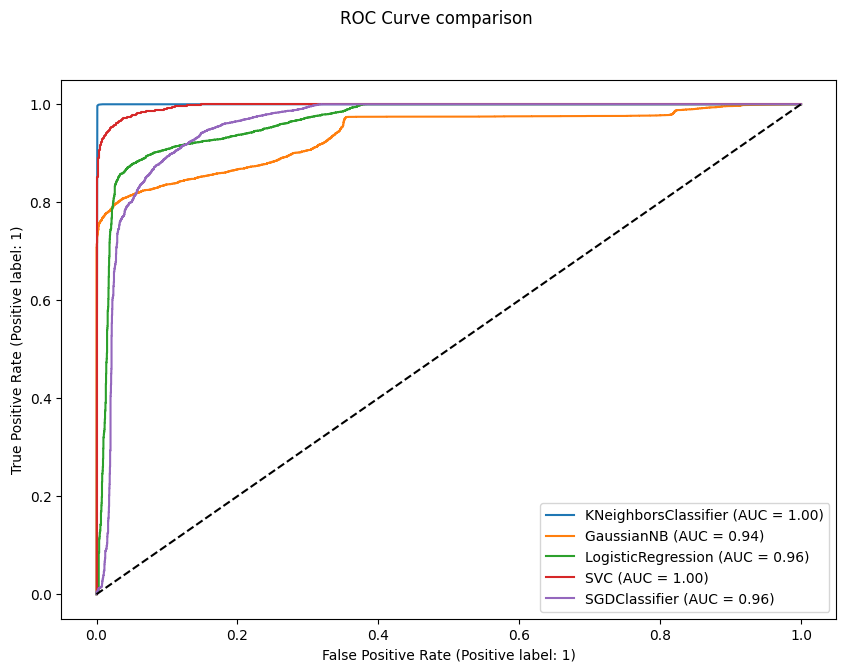

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7] 

fig = RocCurveDisplay.from_estimator(models[0], X_test, y_test)

for i in range(1,len(models)):
    # в качестве предсказания исп. predict_proba, который возвращает вероятности класса для каждой точки данных (и который дает лучшие результаты)
    fig = RocCurveDisplay.from_estimator(models[i], X_test, y_test, ax=fig.ax_)

fig.figure_.suptitle("ROC Curve comparison")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


In [ ]:
model_df[['Name', 'AUC']].T

,0,1,2,3,4
Name,KNeighborsClassifier,GaussianNB,LogisticRegression,SVC,SGDClassifier
AUC,0.998038,0.610357,0.85592,0.945522,0.846823


# Задание № 3

### Реализация метрик

Реализуем метрики Accuracy, Precision, Recall, F1

- Accuracy (точность) - это доля правильно классифицированных образцов из общего числа образцов.
- Precision (точность) - это доля истинно положительных предсказаний относительно всех положительных предсказаний (истинно положительные + ложно положительные).

- Recall (полнота) - это доля истинно положительных предсказаний относительно всех фактических положительных образцов (истинно положительные + ложно отрицательные).

- F1 Score (F1 - мера) - это гармоническое среднее между Precision и Recall и вычисляется по формуле: 2 * (Precision * Recall) / (Precision + Recall)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def accuracy(y_true, y_pred):
    correct = sum(1 for i in range(len(y_true)) if y_true[i] == y_pred[i])
    return correct / float(len(y_true))

def precision(y_true, y_pred, label):
    true_positives = sum(1 for i in range(len(y_true)) if y_pred[i] == label and y_true[i] == label)
    all_positives = sum(1 for i in range(len(y_pred)) if y_pred[i] == label)
    return true_positives / float(all_positives)

def recall(y_true, y_pred, label):
    true_positives = sum(1 for i in range(len(y_true)) if y_pred[i] == label and y_true[i] == label)
    all_y_true_positives = sum(1 for i in range(len(y_true)) if y_true[i] == label)
    return true_positives / float(all_y_true_positives)

def f1_score(y_true, y_pred, label):
    precision_ = precision(y_true, y_pred, label)
    recall_ = recall(y_true, y_pred, label)
    try:
        return 2 * (precision_ * recall_) / (precision_ + recall_)
    except ZeroDivisionError:
        return 0
    

# Пример использования
y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 1, 0, 0, 1]
label = 1 # бинарная регрессия

acc = accuracy(y_true, y_pred)
prec = precision(y_true, y_pred, label)
rec = recall(y_true, y_pred, label)
f1 = f1_score(y_true, y_pred, label)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
confusion_matrix(y_true, y_pred)

Accuracy: 0.5714285714285714
Precision: 0.6
Recall: 0.75
F1 Score: 0.6666666666666665


array([[1, 2],
       [1, 3]], dtype=int64)

### Реализация K-Nearest Neighbors (метод K-ближайших соседей)

In [ ]:
%run -m Class_KNN

Попробуем на простеньком датасете с ирисами 🌷

In [ ]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Итого имеем 3 класса:
- `setosa` - щетинистый
- `versicolor` - разноцветный
- `virginica` - виргинский

In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}') # test_size = 0.25

X_train shape: (112, 4), y_train shape: (112,),
X_test shape: (38, 4), y_test shape: (38,)


In [ ]:
X_train[1]

array([5.8, 2.6, 4. , 1.2])

In [ ]:
knn = K_Nearest_Neighbors()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [ ]:
print("Accuracy:", accuracy(y_test, y_pred))
print()
for i in range(3):
    print('Class №', i)
    print("Precision:", precision(y_test, y_pred, i))
    print("Recall:", recall(y_test, y_pred, i))
    print("F1 Score:", f1_score(y_test, y_pred, i))
    print()
confusion_matrix(y_test, y_pred)

Accuracy: 0.9736842105263158

Class № 0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class № 1
Precision: 1.0
Recall: 0.9375
F1 Score: 0.967741935483871

Class № 2
Precision: 0.9
Recall: 1.0
F1 Score: 0.9473684210526316



array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [ ]:
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Теперь проведем те же манипуляции, только с помощью библиотеки sklearn

In [ ]:
knn_sklearn = KNeighborsClassifier(n_neighbors=5)

knn_model_sklearn = knn_sklearn.fit(X_train, y_train)

knn_predictions_1 = knn_model_sklearn.predict(X_test)
print(knn_predictions_1)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [ ]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Все метрики совпадают 🥳